# Part I - (Demographic and Behaviour Analysis of FordGoBike)
## by (Abdulaziz Alfehaid)

## Introduction

>The data was suggested by udacity, and it includes information about individual rides made in a bike-sharing system called "Ford Go Bike" covering the greater San Francisco Bay area. 

>It was download from this link https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1. Gathering data

In [2]:
#Loading our chosen dataset
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
#taking a sample to be familiar with the data
df.sample(10)

duration_sec                start_time                  end_time  \
162013           244  2019-02-05 13:04:46.9830  2019-02-05 13:08:51.9120   
13042            401  2019-02-27 16:59:51.0200  2019-02-27 17:06:32.3710   
94095            761  2019-02-15 16:52:14.8400  2019-02-15 17:04:56.0830   
74284            230  2019-02-19 11:00:03.3090  2019-02-19 11:03:53.5710   
109852           635  2019-02-12 18:29:50.9050  2019-02-12 18:40:26.8260   
119148           504  2019-02-11 18:07:02.3600  2019-02-11 18:15:26.7190   
59051            416  2019-02-20 21:22:19.0910  2019-02-20 21:29:16.0680   
32746            688  2019-02-24 13:36:49.5370  2019-02-24 13:48:17.8620   
64551            347  2019-02-20 11:48:07.3540  2019-02-20 11:53:55.0020   
21308           1135  2019-02-26 09:09:59.6180  2019-02-26 09:28:54.6780   

        start_station_id                                 start_station_name  \
162013             340.0                            Harmon St at Adeline St   
13042               58.0                               Market St at 10th St   
94095                8.0                      The Embarcadero at Vallejo St   
74284              243.0                        Bancroft Way at College Ave   
109852              13.0                     Commercial St at Montgomery St   
119148             355.0                            23rd St at Tennessee St   
59051              289.0                                5th St at Taylor St   
32746               95.0                              Sanchez St at 15th St   
64551               67.0  San Francisco Caltrain Station 2  (Townsend St...   
21308              323.0                                 Broadway at Kearny   

        start_station_latitude  start_station_longitude  end_station_id  \
162013               37.849735              -122.270582           188.0   
13042                37.776619              -122.417385            90.0   
94095                37.799953              -122.398525            30.0   
74284                37.869360              -122.254337           240.0   
109852               37.794231              -122.402923            49.0   
119148               37.755367              -122.388795           144.0   
59051                37.351017              -121.895921           275.0   
32746                37.766219              -122.431060           134.0   
64551                37.776639              -122.395526           321.0   
21308                37.798014              -122.405950            79.0   

                                      end_station_name  end_station_latitude  \
162013                             Dover St at 57th St             37.842630   
13042                            Townsend St at 7th St             37.771058   
94095   San Francisco Caltrain (Townsend St at 4th St)             37.776598   
74284                        Haste St at Telegraph Ave             37.866043   
109852                             S Park St at 3rd St             37.780760   
119148                                    Precita Park             37.747300   
59051                              Julian St at 6th St             37.342997   
32746                           Valencia St at 24th St             37.752428   
64551                                 5th St at Folsom             37.780146   
21308                             7th St at Brannan St             37.773492   

        end_station_longitude  bike_id   user_type  member_birth_year  \
162013            -122.267738     1829  Subscriber             1968.0   
13042             -122.402717     5756  Subscriber             1981.0   
94095             -122.395282     5426    Customer             1990.0   
74284             -122.258804     4666  Subscriber             1998.0   
109852            -122.394989     1553  Subscriber             1981.0   
119148            -122.411403     5413  Subscriber             1975.0   
59051             -121.888889     3858  Subscriber             1957.0   
32746     

## 2. Assessing data

>## 2a. Exploring

In [4]:
#checking data properties
df.shape

(183412, 16)

In [5]:
#checking data properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

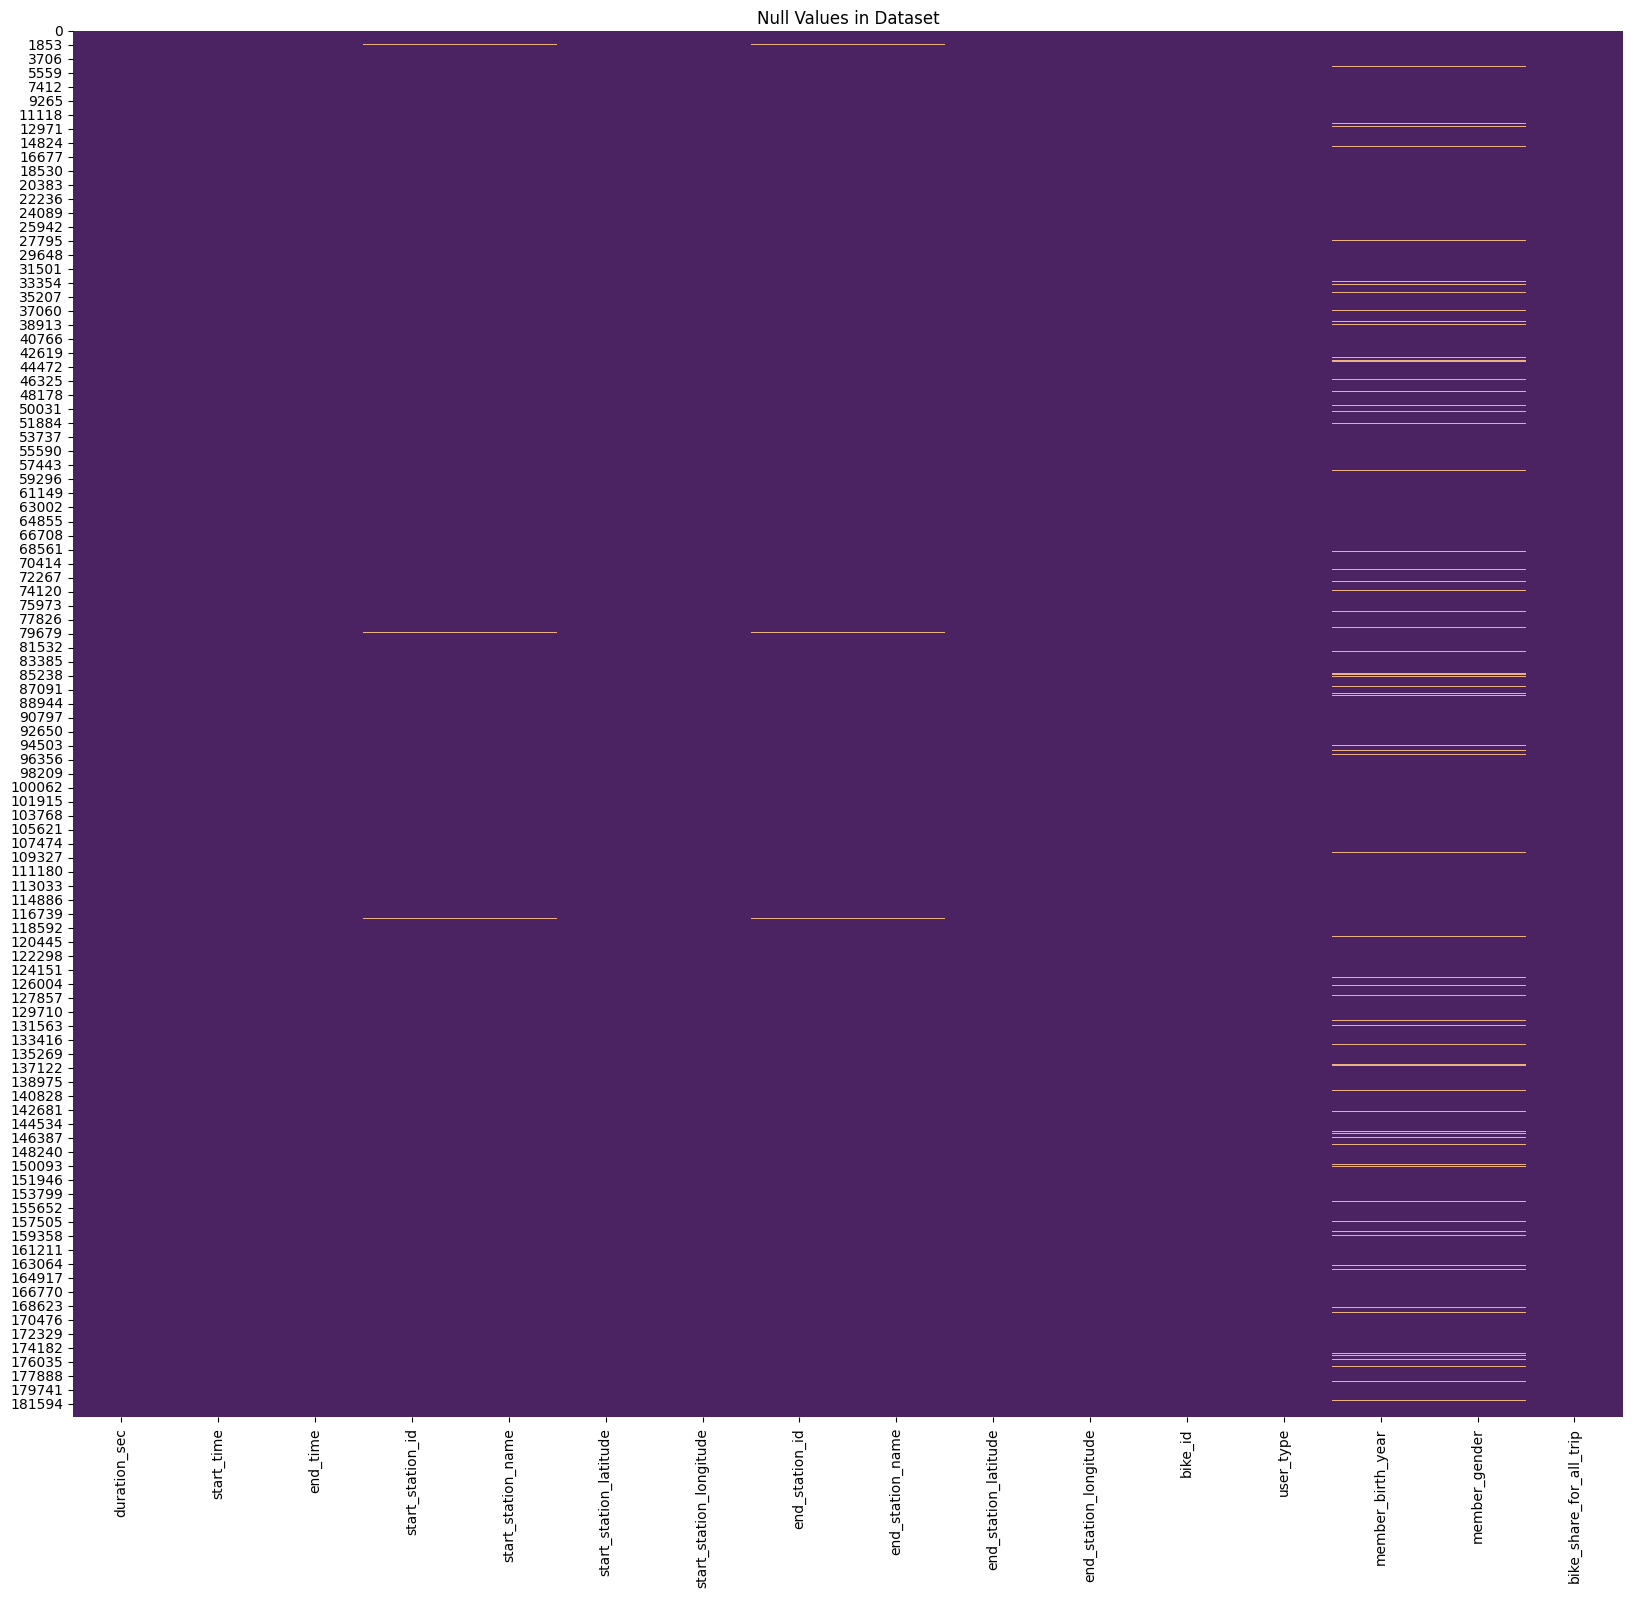

In [6]:
#visualizing Nulls as a heatmap for exploring purposes
plt.figure(figsize=(20, 18))
sns.heatmap(df.isnull(), cmap='flare_r', cbar=False)
plt.title('Null Values in Dataset')
plt.show()

We see that there is 6 columns that has null values

In [7]:
#Counting all null values after detection in the heatmap
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#checking basic statistical summary for any problems in the data
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [9]:
#Checking how many users have the minimum value of age
df[df.member_birth_year == 1878.000000]

duration_sec                start_time                  end_time  \
27370          1474  2019-02-25 09:28:42.1610  2019-02-25 09:53:17.0680   

       start_station_id                                 start_station_name  \
27370              15.0  San Francisco Ferry Building (Harry Bridges Pl...   

       start_station_latitude  start_station_longitude  end_station_id  \
27370               37.795392              -122.394203           386.0   

             end_station_name  end_station_latitude  end_station_longitude  \
27370  24th St at Bartlett St             37.752105            -122.419724   

       bike_id user_type  member_birth_year member_gender  \
27370     6436  Customer             1878.0        Female   

      bike_share_for_all_trip  
27370                      No

In [10]:
#checking the highest 10 rides durations
df.nlargest(10,['duration_sec'])

duration_sec                start_time                  end_time  \
101361         85444  2019-02-13 17:59:55.1240  2019-02-14 17:43:59.9540   
85465          84548  2019-02-16 15:48:25.0290  2019-02-17 15:17:33.0800   
153705         83772  2019-02-05 12:44:54.2860  2019-02-06 12:01:06.6310   
127999         83519  2019-02-09 15:16:17.5370  2019-02-10 14:28:17.2700   
112435         83407  2019-02-11 16:25:33.0690  2019-02-12 15:35:40.9560   
5203           83195  2019-02-27 14:47:23.1810  2019-02-28 13:53:58.4330   
95750          82512  2019-02-14 13:56:21.7280  2019-02-15 12:51:34.3150   
173365         82385  2019-02-02 13:07:43.0360  2019-02-03 12:00:48.1750   
8631           81549  2019-02-27 09:41:38.5520  2019-02-28 08:20:48.3860   
176987         80891  2019-02-01 11:05:18.9760  2019-02-02 09:33:30.1690   

        start_station_id                                 start_station_name  \
101361               5.0       Powell St BART Station (Market St at 5th St)   
85465                3.0       Powell St BART Station (Market St at 4th St)   
153705              78.0                                Folsom St at 9th St   
127999              72.0                                Page St at Scott St   
112435              77.0                               11th St at Natoma St   
5203               243.0                        Bancroft Way at College Ave   
95750              368.0                               Myrtle St at Polk St   
173365             377.0                              Fell St at Stanyan St   
8631               138.0                             Jersey St at Church St   
176987              44.0  Civic Center/UN Plaza BART Station (Market St ...   

        start_station_latitude  start_station_longitude  end_station_id  \
101361               37.783899              -122.408445            98.0   
85465                37.786375              -122.404904           368.0   
153705               37.773717              -122.411647           345.0   
127999               37.772406              -122.435650            43.0   
112435               37.773507              -122.416040           344.0   
5203                 37.869360              -122.254337           248.0   
95750                37.785434              -122.419622            44.0   
173365               37.771917              -122.453704           377.0   
8631                 37.750900              -122.427411           140.0   
176987               37.781074              -122.411738            55.0   

                                         end_station_name  \
101361                             Valencia St at 16th St   
85465                                Myrtle St at Polk St   
153705                              Hubbell St at 16th St   
127999  San Francisco Public Library (Grove St at Hyde...   
112435                                      16th St Depot   
5203                           Telegraph Ave at Ashby Ave   
95750   Civic Center/UN Plaza BART Station (Market St ...   
173365                              Fell St at Stanyan St   
8631                        Cesar Chavez St at Dolores St   
176987                             Webster St at Grove St   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
101361             37.765052            -122.421866     6168  Subscriber   
85465              37.785434            -122.419622     6301  Subscriber   
153705             37.766483            -122.398279     3405    Customer   
127999             37.778768            -122.415929     5561    Customer   
112435             37.766349            -122.396292     1842    Customer   
5203               37.855956            -122.259795     5781  Subscriber   
95750              37.781074            -122.411738     6152    Customer   
173365             37.771917            -122.453704     2933    Customer   
8631               37.747858            -122.424986     2266  Subscriber   
176987             37.777053            -12

All rides durations seems within a normal range and they all have close values to each other

### What is the structure of your dataset?

> The data has 183,412 records(rows) that represents each usage of the service called FordGoBike, and 16 variables(columns) that describe different information.


> The columns are: 
> * duration_sec
> * start_time
> * end_time
> * start_station_id
> * start_station_name
> * start_station_latitude
> * start_station_longitude
> * end_station_id
> * end_station_name
> * end_station_latitude
> * end_station_longitude
> * bike_id
> * user_type
> * member_birth_year
> * member_gender
> * bike_share_for_all_trip


### What is/are the main feature(s) of interest in your dataset?

> The main feature that usually interest me is the demographic analysis of users and behaviours, that's what I will be focusing on. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help support my investigation are the Variables(Columns): 
> ##### demographically: 
> * member_birth_year
> * member_gender
> ##### behaviourally: 
> * user_type
> * duration_sec




>## 2b. Findings

>### Quality

>1- Null values in 6 columns, but they are insignificant.

>2- Outlier value in "member_birth_year"


>### Tidiness

>3- No Age column which should help with calculations and visualization.

>4- Some Columns aren't necessary for this analysis, and they are (start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude).

>5- "duration_sec" could be calculated in some other units to be more indicating. 

## 3. Cleaning data

In [11]:
#creating a copy to maintain the raw data
cleaned_df = df.copy()

>### problem 1

we are gonna drop Null records because they are insignificant using dropna().

In [12]:
#Dropping Null records
cleaned_df = cleaned_df.dropna()

In [13]:
#Validating cleaning
print(cleaned_df.isna().sum())
print("\n\n====================================\n\n")
cleaned_df.info()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64




<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_lati

>### problem 2

The age adds up to be 145 which is considered an outlier, so we are gonna drop it.

In [14]:
#checking outlier
cleaned_df[cleaned_df.member_birth_year == 1878.000000]

duration_sec                start_time                  end_time  \
27370          1474  2019-02-25 09:28:42.1610  2019-02-25 09:53:17.0680   

       start_station_id                                 start_station_name  \
27370              15.0  San Francisco Ferry Building (Harry Bridges Pl...   

       start_station_latitude  start_station_longitude  end_station_id  \
27370               37.795392              -122.394203           386.0   

             end_station_name  end_station_latitude  end_station_longitude  \
27370  24th St at Bartlett St             37.752105            -122.419724   

       bike_id user_type  member_birth_year member_gender  \
27370     6436  Customer             1878.0        Female   

      bike_share_for_all_trip  
27370                      No

In [15]:
#dropping outlier
cleaned_df.drop(27370, inplace=True)

In [16]:
#Validating cleaning
cleaned_df[cleaned_df.member_birth_year == 1878.000000]

Empty DataFrame
Columns: [duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip]
Index: []

>### problem 3

We will add an Age column which should help with calculations and visualization.

In [17]:
#calculate the current year
current_year = datetime.now().year

#add a new column 'Age' based on the birth year
cleaned_df['Age'] = current_year - cleaned_df['member_birth_year']

In [18]:
#Validating cleaning

cleaned_df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip   Age  
0          Male                      No  39.0  
2          Male                      No  51.0  
3         Other                      No  34.0  
4          Male                     Yes  49.0  
5          Male                      No  64.0

>### problem 4

Dropping columns that aren't necessary for this analysis, and they are: (start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude).

In [19]:
cleaned_df.drop(['start_station_longitude', 'start_station_latitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [20]:
#Validating cleaning
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174951 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174951 non-null  int64  
 1   start_time               174951 non-null  object 
 2   end_time                 174951 non-null  object 
 3   start_station_id         174951 non-null  float64
 4   start_station_name       174951 non-null  object 
 5   end_station_id           174951 non-null  float64
 6   end_station_name         174951 non-null  object 
 7   bike_id                  174951 non-null  int64  
 8   user_type                174951 non-null  object 
 9   member_birth_year        174951 non-null  float64
 10  member_gender            174951 non-null  object 
 11  bike_share_for_all_trip  174951 non-null  object 
 12  Age                      174951 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 18.7+ MB


>### problem 5

Calculating "duration_sec" in minutes, hours, and days. to be more indicating. 

In [21]:
#inserting columns
cleaned_df.insert(1, 'duration_min', cleaned_df.duration_sec/60)
cleaned_df.insert(2, 'duration_hrs', cleaned_df.duration_sec/3600)
cleaned_df.insert(3, 'duration_day', cleaned_df.duration_hrs/24)

In [22]:
#Validating cleaning
cleaned_df.head()

duration_sec  duration_min  duration_hrs  duration_day  \
0         52185    869.750000     14.495833      0.603993   
2         61854   1030.900000     17.181667      0.715903   
3         36490    608.166667     10.136111      0.422338   
4          1585     26.416667      0.440278      0.018345   
5          1793     29.883333      0.498056      0.020752   

                 start_time                  end_time  start_station_id  \
0  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750              21.0   
2  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460              86.0   
3  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420             375.0   
4  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740               7.0   
5  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600              93.0   

                                 start_station_name  end_station_id  \
0  Montgomery St BART Station (Market St at 2nd St)            13.0   
2                           Market St at Dolores St             3.0   
3                           Grove St at Masonic Ave            70.0   
4                               Frank H Ogawa Plaza           222.0   
5                      4th St at Mission Bay Blvd S           323.0   

                               end_station_name  bike_id   user_type  \
0                Commercial St at Montgomery St     4902    Customer   
2  Powell St BART Station (Market St at 4th St)     5905    Customer   
3                        Central Ave at Fell St     6638  Subscriber   
4                         10th Ave at E 15th St     4898  Subscriber   
5                            Broadway at Kearny     5200  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip   Age  
0             1984.0          Male                      No  39.0  
2             1972.0          Male                      No  51.0  
3             1989.0         Other                      No  34.0  
4             1974.0          Male                     Yes  49.0  
5             1959.0          Male                      No  64.0

## 4. Storing data

In [23]:
cleaned_df.to_csv('clean-fordgobike-tripdata.csv', index=False)

## Univariate Exploration

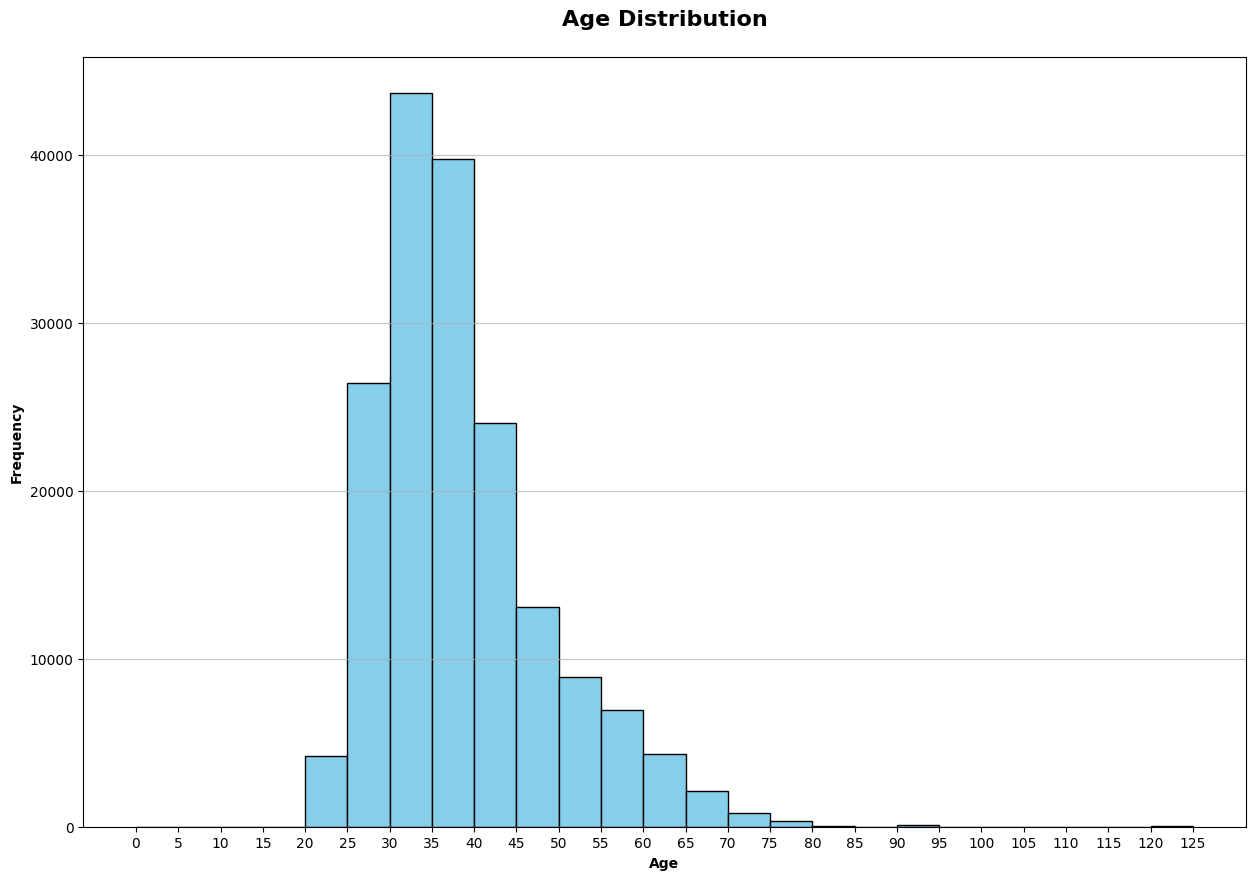

In [24]:
#We want to investigate the age distribution of members as a histogram
#plotting the histogram
plt.figure(figsize=(15, 10))
bin_edges = np.arange(0,126,5) # Changed axis limit to see the shape where most data points lie.
ticks = np.arange(0,126,5)
labels = ['{}'.format(val) for val in ticks]

plt.hist(cleaned_df['Age'], bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontweight='bold', y=1.03, fontsize=16)
plt.xlabel('Age', fontweight='bold')
plt.xticks(ticks, labels)
plt.ylabel('Frequency', fontweight='bold')
plt.grid(axis='y', alpha=0.75)

Most Age group that uses the service are 30-40.

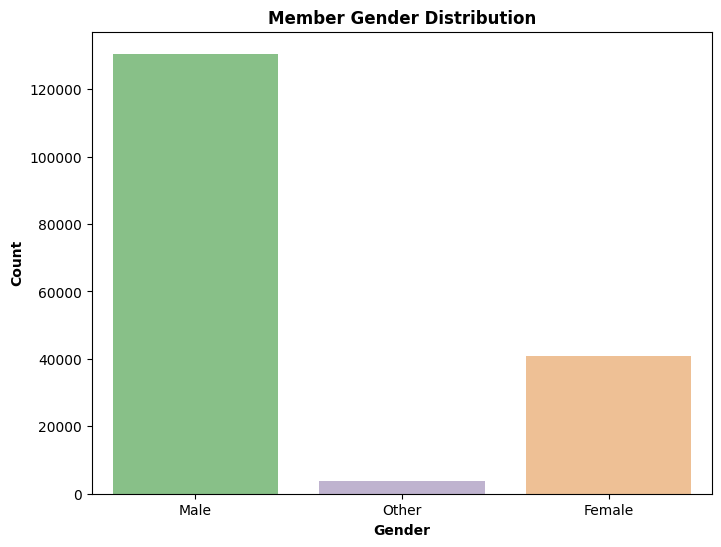

In [25]:
#we want to investigate the gender distribution of members as a count plot
#plotting a count plot of 'member_gender'
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_df, x='member_gender', palette='Accent')
plt.title('Member Gender Distribution', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

#display the count plot
plt.show()

As shown, Males are the biggest users of the service more than the 2 genders combined.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I plotted the distribution of age and member gender, there were no unusual point except one case of 145 years old female that used the bikes and it doesn't make since so I dropped it.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the member gender plot, what was unsual to me is the huge difference between males and other member genders, it was very noticable that males are the biggest audience for this service. I dropped some insignificant number of null records that had no values for member gender and other columns. I did it to make the analysis more organized and direct.

## Bivariate Exploration

In [26]:
cleaned_df.describe()

duration_sec   duration_min   duration_hrs   duration_day  \
count  174951.000000  174951.000000  174951.000000  174951.000000   
mean      703.998342      11.733306       0.195555       0.008148   
std      1642.208567      27.370143       0.456169       0.019007   
min        61.000000       1.016667       0.016944       0.000706   
25%       323.000000       5.383333       0.089722       0.003738   
50%       510.000000       8.500000       0.141667       0.005903   
75%       789.000000      13.150000       0.219167       0.009132   
max     84548.000000    1409.133333      23.485556       0.978565   

       start_station_id  end_station_id        bike_id  member_birth_year  \
count     174951.000000   174951.000000  174951.000000      174951.000000   
mean         139.002835      136.603060    4482.576390        1984.803745   
std          111.648744      111.334357    1659.194107          10.115538   
min            3.000000        3.000000      11.000000        1900.000000   
25%           47.000000       44.000000    3799.000000        1980.000000   
50%          104.000000      101.000000    4960.000000        1987.000000   
75%          239.000000      238.000000    5505.000000        1992.000000   
max          398.000000      398.000000    6645.000000        2001.000000   

                 Age  
count  174951.000000  
mean       38.196255  
std        10.115538  
min        22.000000  
25%        31.000000  
50%        36.000000  
75%        43.000000  
max       123.000000

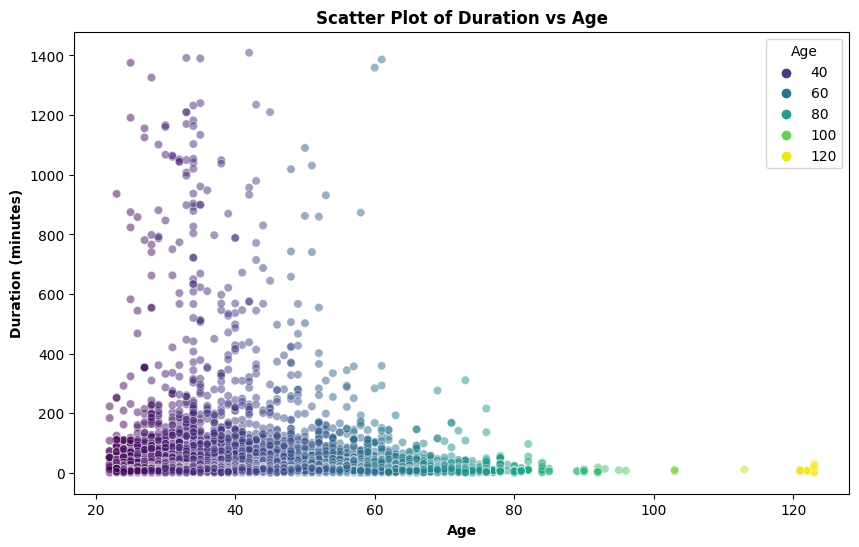

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='Age', y='duration_min', alpha=0.5, hue='Age', palette='viridis')
plt.title('Scatter Plot of Duration vs Age', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Duration (minutes)', fontweight='bold')
plt.legend(title='Age')

The Scatter plot shows that when Age increases the duration of using the service decreases.

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='user_type', y='duration_min', palette='viridis')
plt.title('Boxplot of Duration in mins by User Type', fontweight='bold')
plt.xlabel('User Type', fontweight='bold')
plt.ylabel('Duration (minutes)', fontweight='bold')

Text(0, 0.5, 'Duration (minutes)')

According to the boxplot there is no clear difference in the behaviour of different user types regarding trip duration, subscribers are slightly more well distributed but could be caused by having more records.

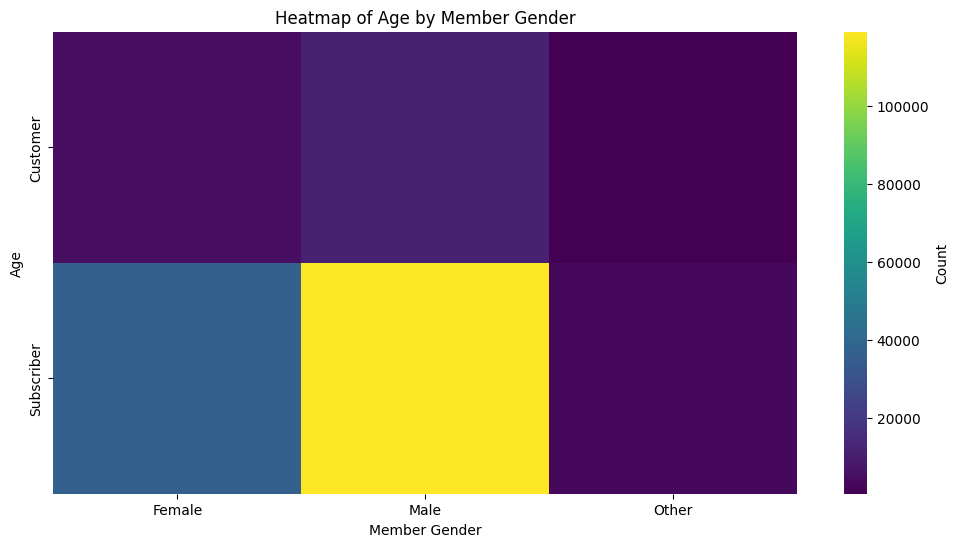

In [29]:
contingency_table = pd.crosstab(cleaned_df['user_type'], cleaned_df['member_gender'])


plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Age by Member Gender')
plt.xlabel('Member Gender')
plt.ylabel('Age')

# Display the heatmap
plt.show()

The heatmap shows that the service doesn't have much customers in general. but still males has the highest number of users across both user types followed by females and finally Other.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Bivariate plotting helped me see the relationship between a demographic attribute vs a behavioural attribute, that enabled me to analyze the behaviours of each demographic.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Mainly I focused on the main features and they had a lot of interesting observations, like proving the assumption of when Age increases the duration of using the service decreases.

## Multivariate Exploration

Text(0.5, 1.02, 'Facet Plot of Age and Duration by User Type')

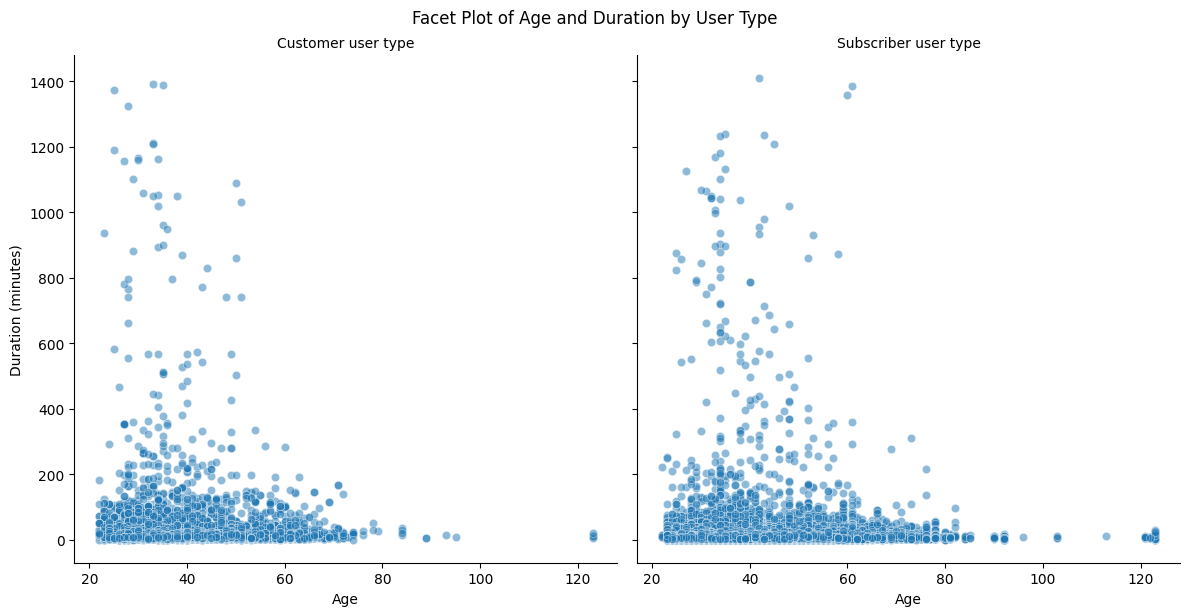

In [30]:
g = sns.FacetGrid(cleaned_df, col='user_type', margin_titles=True, height=6)
g.map(sns.scatterplot, 'Age', 'duration_min', alpha=0.5)
g.set_axis_labels('Age', 'Duration (minutes)')
g.set_titles(col_template='{col_name} user type')
g.fig.suptitle('Facet Plot of Age and Duration by User Type', y=1.02)

Customer user type and Subscriber user type has the same 2D distribution on the variables Duration(minutes) and Age, there might be small insignificant changes but they don't indicate any patterns or behaviours.

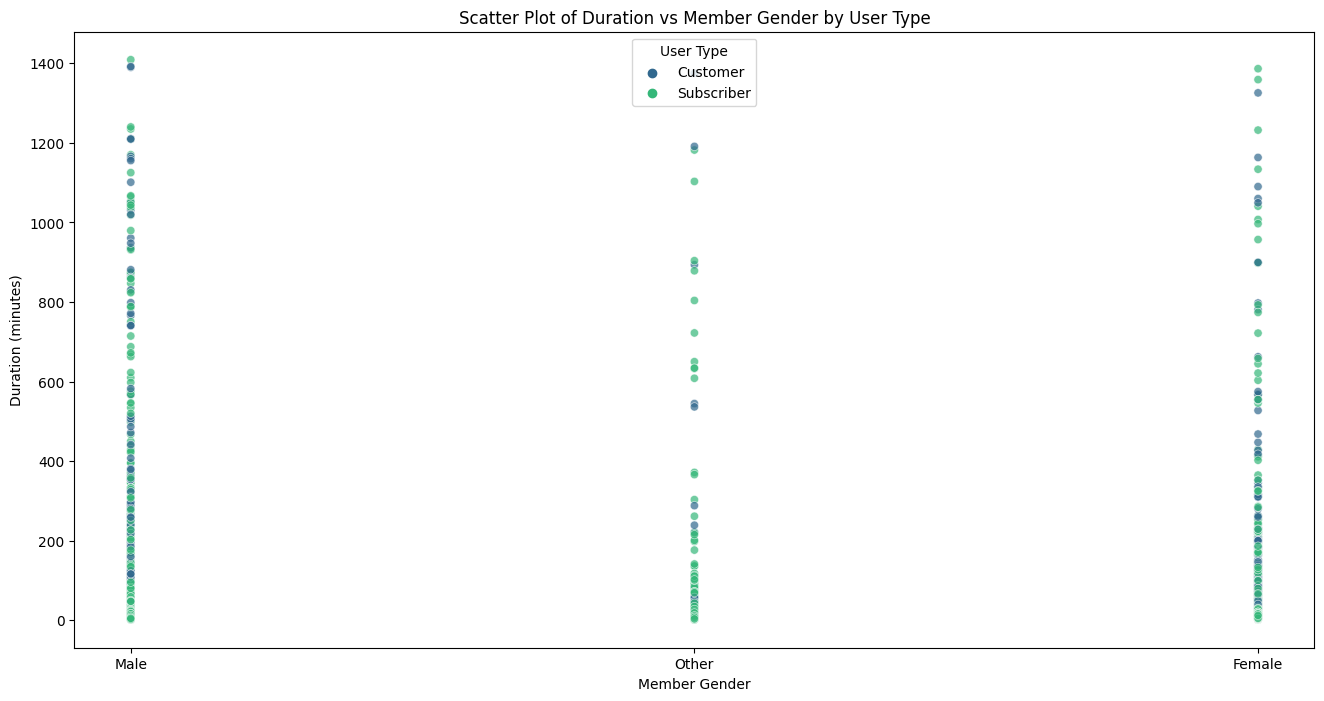

In [31]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=cleaned_df, x='member_gender', y='duration_min', hue='user_type', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Duration vs Member Gender by User Type')
plt.xlabel('Member Gender')
plt.ylabel('Duration (minutes)')
plt.legend(title='User Type')

This Scatterplot shows, that male users doesn't have any special behaviours regardless of the user type, where the gender Other  Customers rarely take long trips and they have a noticable amount of subscribers more than customers, and finally females both user types tend to have the same behaviour but they have a low duration time average compared to males caused by the trips they make are usually short.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between user type, age, and duration, strengthened the idea that the duration didnt change based on user type neither member gender.

### Were there any interesting or surprising interactions between features?

> The interaction between user type, age, and duration. Customer user type and Subscriber user type has the same 2D distribution on the scatterplot.

## Conclusions

> In conclusion, the dataset showcases rich information about user behavior, age demographics, and ride durations.

> ##### Key insights & findings: 
> * The Age group with highest number of users are 30-40.
> * Male users are more than Females and Others combined.
> * When Age increases the duration of using the service decreases.
> * When it comes to Age & Duration both usertypes has the same distribution, so its irrelevant.

> These insights can be valuable for understanding user preferences, tailoring marketing strategies, and optimizing user experience. Further analysis and exploration could involve examining trends over time, exploring the impact of specific events or seasons, and conducting statistical tests to validate observed patterns. This analysis provides a solid foundation for more in-depth investigations and strategic decision-making related to the dataset.